# SQUID example of pairwise modeling using ResidualBind32

## Import SQUID scripts and install dependencies

In [1]:
!pip install squid-nn --quiet
!pip install logomaker --quiet
!pip install mavenn --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 12.5 MB/s eta 0:00:00


## Download ResidualBind-32 model

In [2]:
# download model
!git clone https://github.com/evanseitz/squid-manuscript.git --quiet

# Note: if problems encountered downloading model, use the published deposit (large file):
#!wget 'https://zenodo.org/records/10047748/files/squid-manuscript.zip'

In [3]:
import sys
import numpy as np
import mavenn
import squid

In [4]:
# download schematics
from IPython.display import Image
!gdown 11iAk30kbslDTyASXq2QQwEauSsOONl2G --quiet
!gdown 1iTd8x5TKmJ5eA2uZlNOma6kHSo5iDBjc --quiet
!gdown 1JXeL5EzaGFF8SwLMDBcLP0h_muo7f6Eu --quiet
!gdown 1Z2dg4L1hmWFHN3FgrhI9I7b8zterpsaD --quiet

## Import ResidualBind-32 CNN model

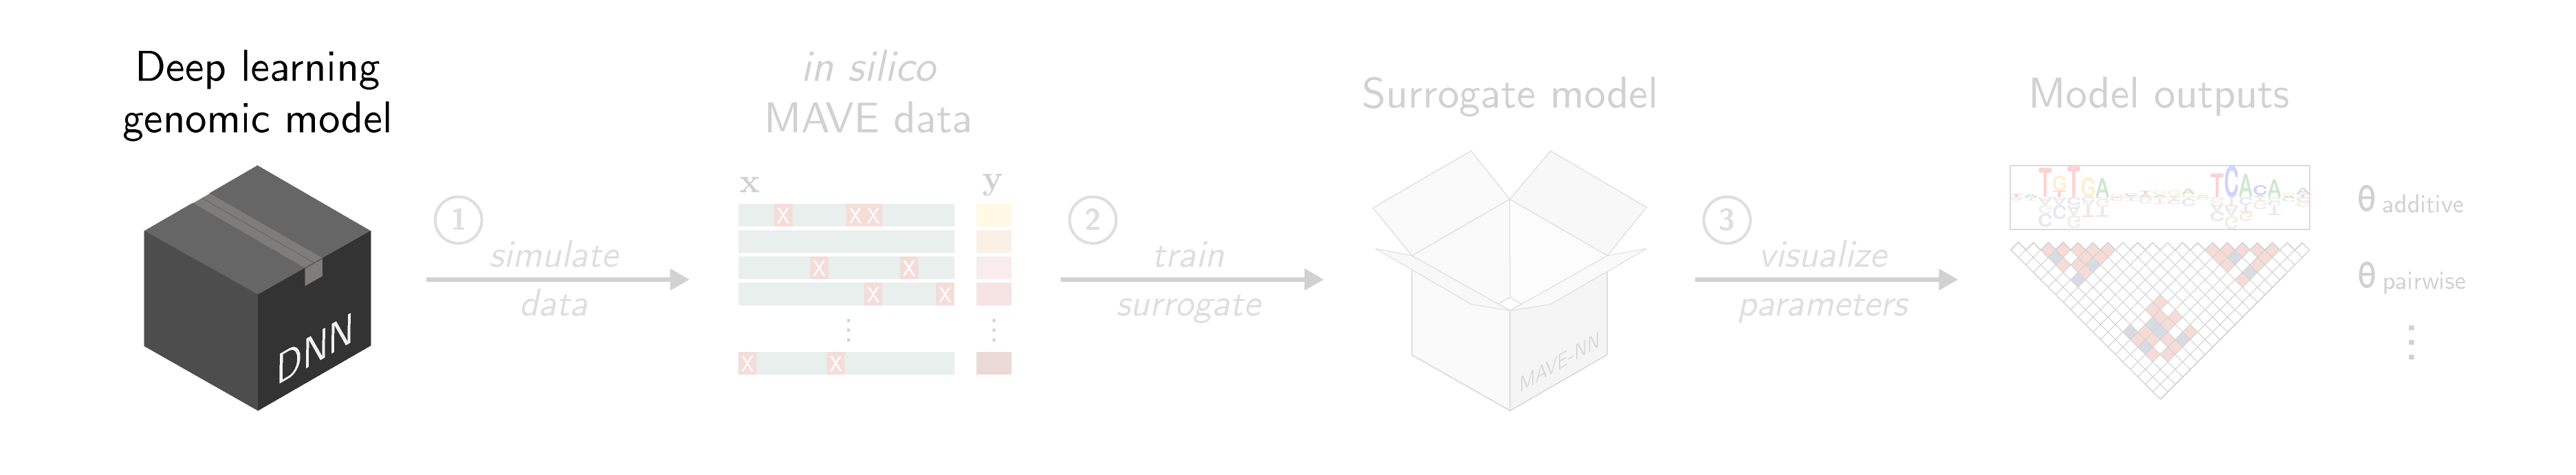

In [5]:
Image("schematic_A.png")

In [6]:
sys.path.append('/content/squid-manuscript/examples/examples_GOPHER/a_model_assets/scripts')
import utils as re32_utils

model, bin_size = re32_utils.read_model('/content/squid-manuscript/examples/examples_GOPHER/a_model_assets/model_ResidualBind32_ReLU_single', compile_model=False)#True)

# Inputs shape:   (n, 2048, 4)
# Outputs shape:  (1, 64, 15) : 64-bin-resolution profile for each of the 15 cell lines

## Define hyperparameters for ResidualBind-32


In [7]:
# define sequence-of-interest and output head (task)
seq_index = 641     # example locus with a pronounced AP-1 motif surrounded by two others
task_idx = 13       # PC-3 cell line
alphabet = ['A','C','G','T']

## Load ResidualBind-32 test set

In [8]:
if 1: #directly insert sequence-of-interest
  seq = 'GTCTGAGGGGTTGCTTTATGGCCTGCTTCAGGAAAGGGGGCAGGAGAGGGGCCGAGAGACCTCCCTGCTTCTGCTGTGTCCTCAAATGCGAAGGCACCATATTTTGGTGAAGTGTGTTCTGAACCTCATCATTAGTAAATGGTAGAACTACATTTGACTCTAAGCAGTCTGGTTCCATGGTCTTTTCGCCACAATGCCAAAGTATGAAGAGATTATTTTCATGATACTAGGCTACTGTAAATTTTCCTGGTACAGATGTGGTAAGTTGAGATTGACCAGTGCACTGTAAAATCTTTCTTAACATGCCAATGAGGAACCTGGGCTAACCAGGGTGGAAGCCTCTTATTGATGGACTCATCAGATCATTCTAGAGCTAAGCCCCTCTTTCTTGGGACCCCAGTTACATCCTTGGCCTTAAACTTTACTTATGAAAAGTTTAGAACCATGTTCCTGACTACATTAAACATTATTAAAAACTCAGATCTTCTTAACATAATTTTATTCATGGGCTTTTATGTATAGAATTTTAAAAGTCATGATCTGCCATTAAGCCAGGGAAGCAGATGGAAAGTCAGGACTTGGAGCAATTTATTCCCCCTGGCCTCCTTCTCATCCCAGGCCTCAGTCTCTCATCTATAAAATAATATGCCAGGCATTGTTCCTGATTTCTTCCAATACTGTCTTCTGCCCTGACATCTTTCCCAAAGATATTGTTCACCATTCCCCCAGTTTCTTGGGGTTAATCCTGAGTATTCTTAACACCTGCCTTGGTTTTTTTCCATCTGAAGTGTCTTCCTTTGCTGCCTCTTACACAGATCTGCACATCCCTTCAGGTCTCTCCAGCATGCTTTTGCTCCCACATTTCCTTTCCCCCTTCCTGTTCCACAGTACCTAGCGCAGTGTGTTAATTACAGGAAGGTAATATTATAAACTTACTGAGGTTAGAGACTACCACTCATCTTTGAGTCACCTTTGACACAGTACATGGTAAACATTTATTGAATTATATTCTTCCTCACTAGAGGAAATTCCTTCAATAAAAATTTATGTAGAGAGCTGGGGCCCTGTACATACAGTGCTGTCTTCAAAGTTAGCAAACAGCAAGGGGAACATATTTAAACAAGTGGTTACATTGTAACTGATCAGCCGCATCACAAGCAAGTGGAGGCTGCGGTCCTGGGTGTGGGAATGGCTACAGGCCCTGTTAGGTGAATCCTGACTGTGTCCTGGTGAGTGTCCCCTTGAAGCTGGGTCCTGATGGATACTTACTAGATGTTCTCCAGGAAATGAGATTTTCACACAGCCATGGGAAGAAAGCTGCCACGTTGGTAAAAGGCCTGGTTGCTTTCTGTAAGTATCTGGCCAAGTGGGAAACAAGGTCATACCGTGGAATCTGGGCTTGATCCTATAGGTAGGGAGGGGGAGGTTGAAGGTTTTTGAATAAGGGAGTGATGGTCACATTTGTGTTTTAAATAATTAGCTATTGACAACAATAGTAGTTAGTGATTGCCATGTGGAGGATTGTAACTTTAAACTTTTGTATGCTTTTCTGTATTTTTATGTTTACTTTAATGAGTGCATCTTCTGGTTATTTTATTTTTTATTTTTCTTATTTTTGAGACTGAGTTTCGCTCTTGTTGCCCAGGCTGGAGTGTGGTGGCGCTATCTCAACTCACTGCAACCTCCAGCTCCCGGGTTCAAGCGATTCTCCTGCTTCAGCCTCCCAAGTAGCTGAGATTATAGGCATGCGCCACCACGCCCAGCTAATTTTTGTATTTTTAGTAGATGAGGCTTCGCCATGTTGGCTAGGCTGGTCTCCTGACCTCAGATGATCCACCCACCTTGGCCTCCCAAAGTGCTGGGATTACAGGCATGAGCCACTGTGCCCAGCCATCTTCTGGTTATTTTAAATGTCATCCTCTACCCTAGTAGAGTAGAGGATAGACCTGAGACAAGGAAGCCCATTTGAAGGGGTGGAGGGGAGAATGAGTTTAGTTTCGCTGCCTTGAATTTTAAAGCTTATTATCTTATCTGCTGCATTAATTAGA'
  x = squid.utils.seq2oh(seq, alphabet) #i.e., same sequence as retrieved using 'seq_index'=641 (see below)

else: #download entire test set (not required for this example)
  import gdown
  import h5py
  !gdown 1LpfNd39jMC6ygIUdFhvmeIez12iZu0m2
  hf = h5py.File('cell_line_13.h5', 'r')
  x_all = hf["X"][:]
  hf.close()
  x = x_all[seq_index]
  # Note: if problems encountered downloading test set, use the published deposit (large file):
  #!wget 'https://zenodo.org/records/10047748/files/squid-manuscript.zip'

## Retrieve sequence-of-interest from test set

In [9]:
# define mutagenesis window for sequence
start_position = 962-13   # e.g., the nucleotide at position 962 is the start of a pronounced AP1 motif (TGANTCA) in cell line 13
stop_position = 962+7+13

seq_length = x.shape[0]
mut_window = [start_position, stop_position]

## Set up SQUID modules that are dependent on choice of DNN



In [10]:
# set up predictor class for in silico MAVE
pred_generator = squid.predictor.ProfilePredictor(pred_fun=model.predict_on_batch, #required for ResidualBind-32
                                                  task_idx=task_idx,
                                                  batch_size=512,
                                                  save_dir=None,
                                                  #reduce_fun=predictor.profile_sum,
                                                  reduce_fun=squid.predictor.profile_pca,
                                                  )

## Set up remaining SQUID modules and perform *in silico* MAVE

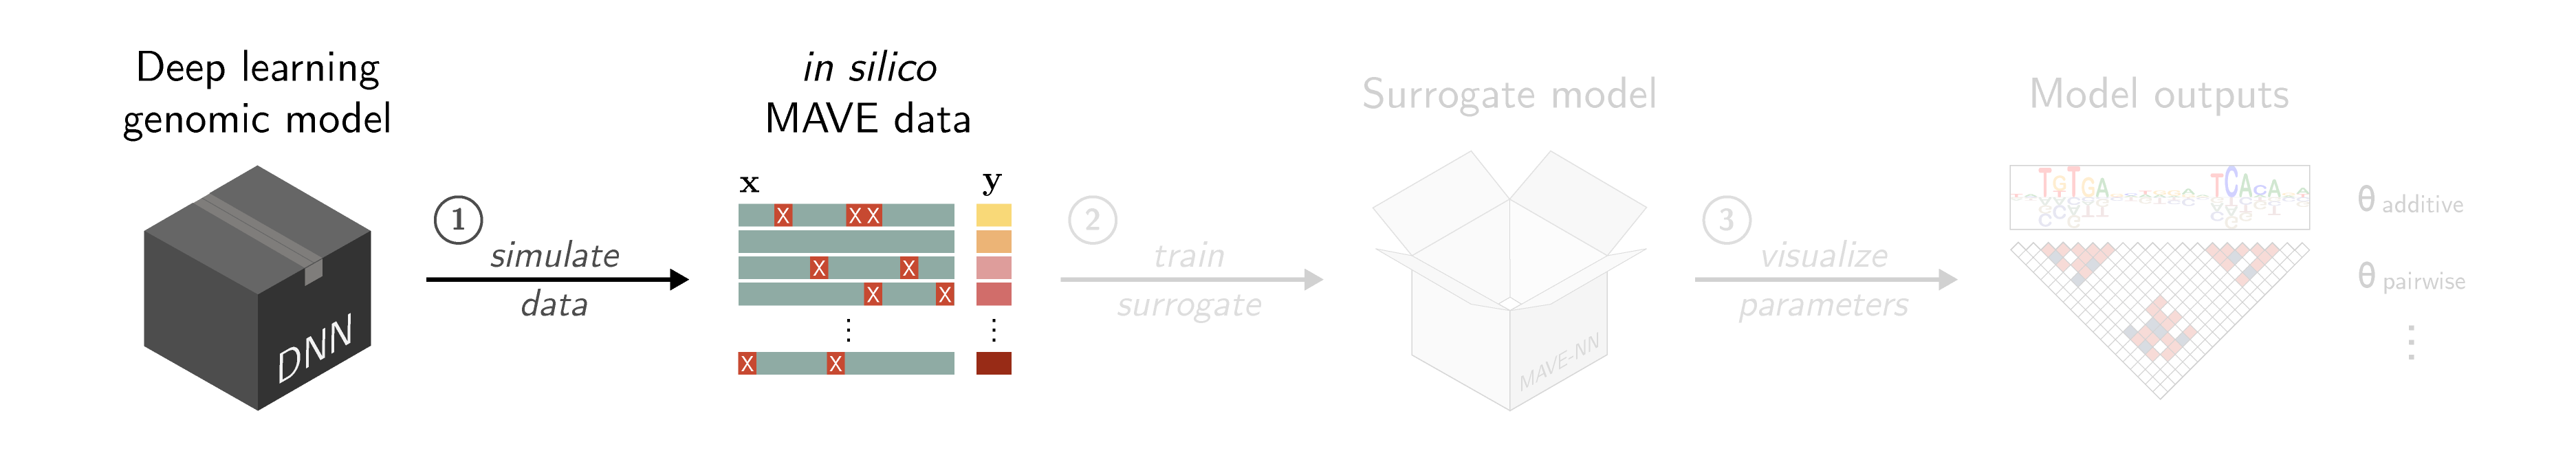

In [11]:
Image("schematic_B.png")

In [12]:
# set up mutagenizer class for in silico MAVE
mut_generator = squid.mutagenizer.RandomMutagenesis(mut_rate=0.1, uniform=False)

# generate in silico MAVE
mave = squid.mave.InSilicoMAVE(mut_generator, pred_generator, seq_length, mut_window=mut_window)
x_mut, y_mut = mave.generate(x, num_sim=100000)


Building in silico MAVE...


Inference: 100%|██████████| 195/195 [07:40<00:00,  2.36s/it]


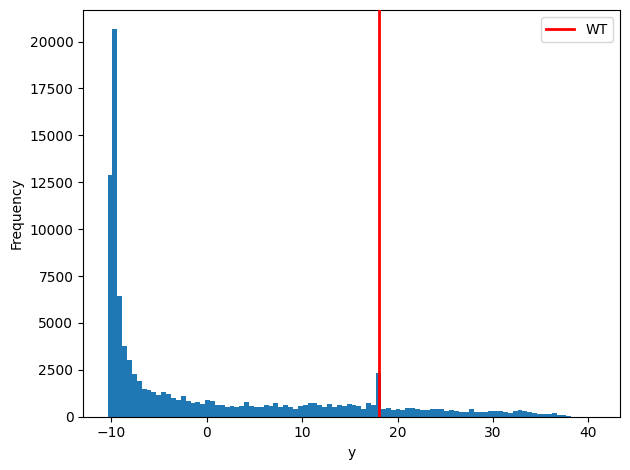

In [13]:
# plot histogram of transformed deepnet predictions
fig = squid.impress.plot_y_hist(y_mut)

## Choose surrogate model and define hyperparameters

In [14]:
# choose surrogate model type
gpmap = 'pairwise' #{'additive', 'pairwise' if MAVE-NN}

# MAVE-NN model with GE nonlinearity
surrogate_model = squid.surrogate_zoo.SurrogateMAVENN(x_mut.shape, num_tasks=y_mut.shape[1],
                                                  gpmap=gpmap, regression_type='GE',
                                                  linearity='nonlinear', noise='SkewedT',
                                                  noise_order=2, reg_strength=0.1,
                                                  alphabet=alphabet, deduplicate=True,
                                                  gpu=True)

## Train surrogate model

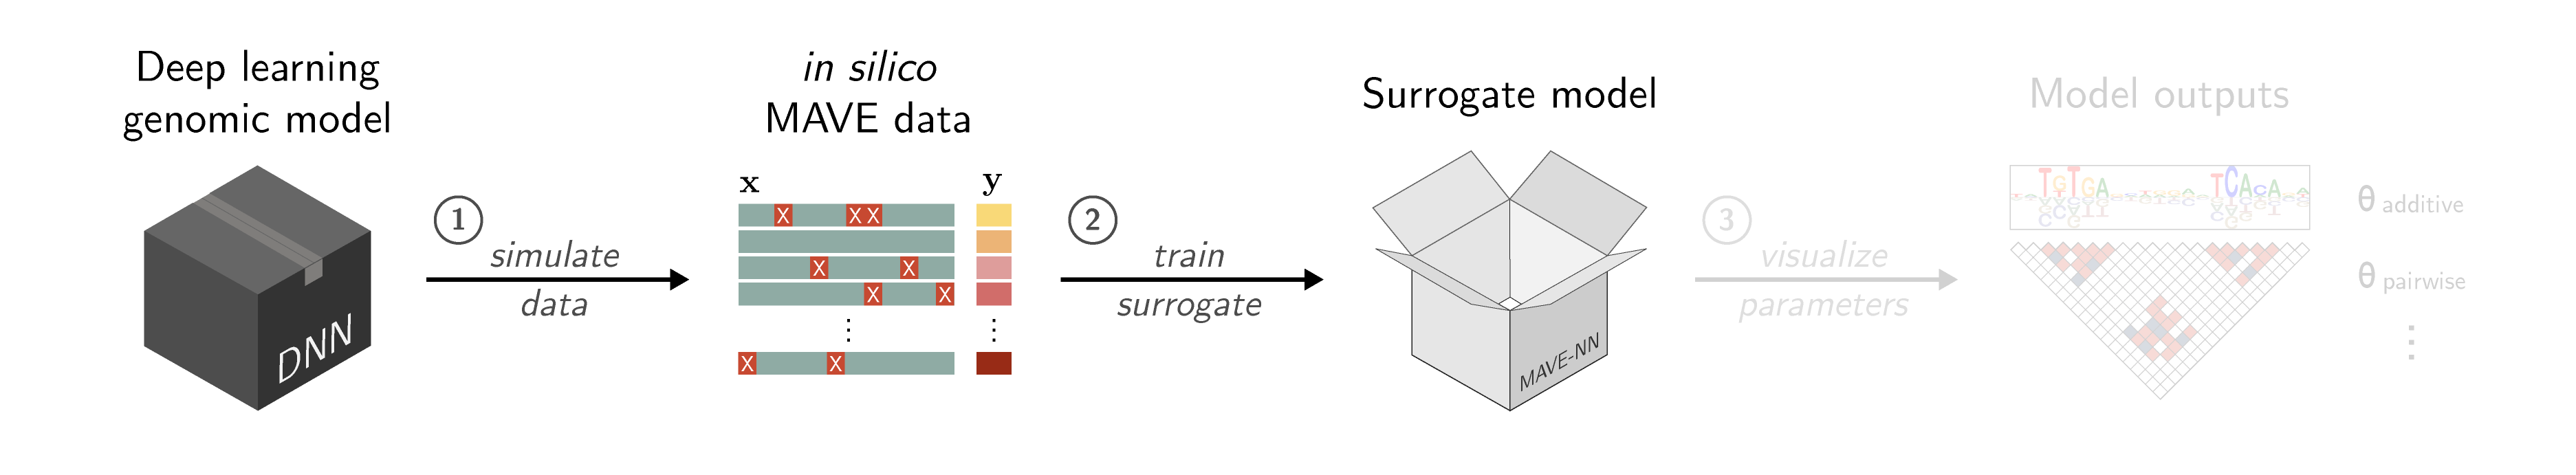

In [15]:
Image("schematic_C.png")

In [16]:
# train surrogate model
surrogate, mave_df = surrogate_model.train(x_mut, y_mut, learning_rate=5e-4, epochs=500, batch_size=100,
                                           early_stopping=True, patience=25, restore_best_weights=True,
                                           save_dir=None, verbose=1)

# retrieve model parameters
params = surrogate_model.get_params(gauge='empirical')

# generate sequence logo
logo = surrogate_model.get_logo(mut_window=mut_window, full_length=seq_length)

  Creating sequence dataframe...

               y                                  x
0      18.067438  TACCACTCATCTTTGAGTCACCTTTGACACAGT
1      30.409475  TACCACTCATCTTTGAGTCACCTCTGACACAGA
2      -3.685825  TACCACTCATCTTCGAGTCAGCTTTGACACAGT
3      -6.221479  TACCATTCATTATTGAATCACCATTCGCCAAGT
4       5.988361  TACCAGTCATCTTTGAGTCACATTTGACCCAGT
...          ...                                ...
99995  -9.923429  TACCACACATCTTAGTGACACCTTTCATACAGT
99996  -9.737094  AACCACTCCTCTTTAAGTCACCTTTCACACCGT
99997  -9.948986  TTCCACTTATATTTGAGACACCCTTCTCACCGT
99998 -10.010083  TACCACTGATGTCTGGGCCACGTTTGACAAAGA
99999  -9.945696  TACCGCTCACCTTTCAGTCACTTTCGACACAGT

[100000 rows x 2 columns]
Training set   :   47,814 observations (  60.07%)
Validation set :   15,949 observations (  20.04%)
Test set       :   15,830 observations (  19.89%)
-------------------------------------------------
Total dataset  :   79,593 observations ( 100.00%)

Train + val set size : 63,763 observations
Test set size        

0epoch [00:00, ?epoch/s]

Training time: 305.8 seconds


## Evaluate model performance

In [17]:
trainval_df, test_df = mavenn.split_dataset(mave_df)
info = surrogate_model.get_info()

Training set   :   47,814 observations (  60.07%)
Validation set :   15,949 observations (  20.04%)
Test set       :   15,830 observations (  19.89%)
-------------------------------------------------
Total dataset  :   79,593 observations ( 100.00%)


Model performance:
  test_I_pred: 2.185 +- 0.008 bits
  max I_var: 2.283381700515747
  max val_I_var: 1.9754642248153687



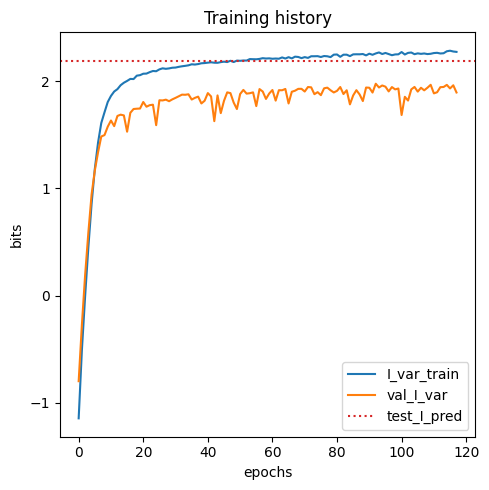

In [18]:
# plot mavenn model performance
fig = squid.impress.plot_performance(surrogate, info=info)

Training set   :   47,814 observations (  60.07%)
Validation set :   15,949 observations (  20.04%)
Test set       :   15,830 observations (  19.89%)
-------------------------------------------------
Total dataset  :   79,593 observations ( 100.00%)



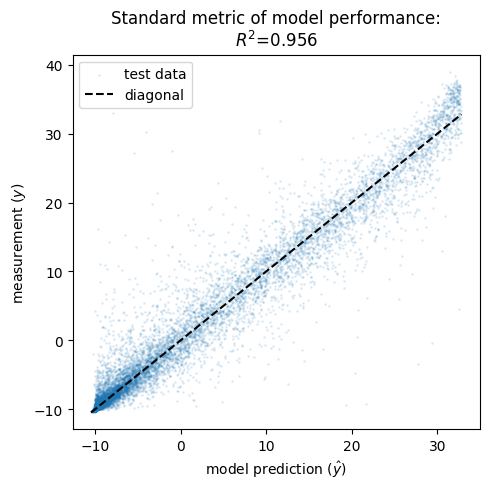

In [19]:
# plot mavenn y versus yhat
fig = squid.impress.plot_y_vs_yhat(surrogate, mave_df=mave_df)

Training set   :   47,814 observations (  60.07%)
Validation set :   15,949 observations (  20.04%)
Test set       :   15,830 observations (  19.89%)
-------------------------------------------------
Total dataset  :   79,593 observations ( 100.00%)



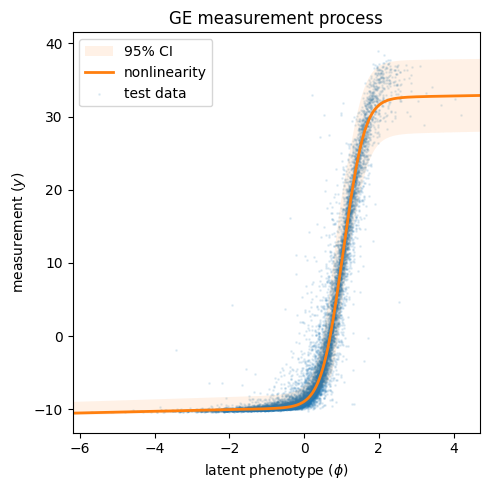

In [20]:
# plot mavenn y versus phi
fig = squid.impress.plot_y_vs_phi(surrogate, mave_df=mave_df)

## Visualize surrogate model parameters

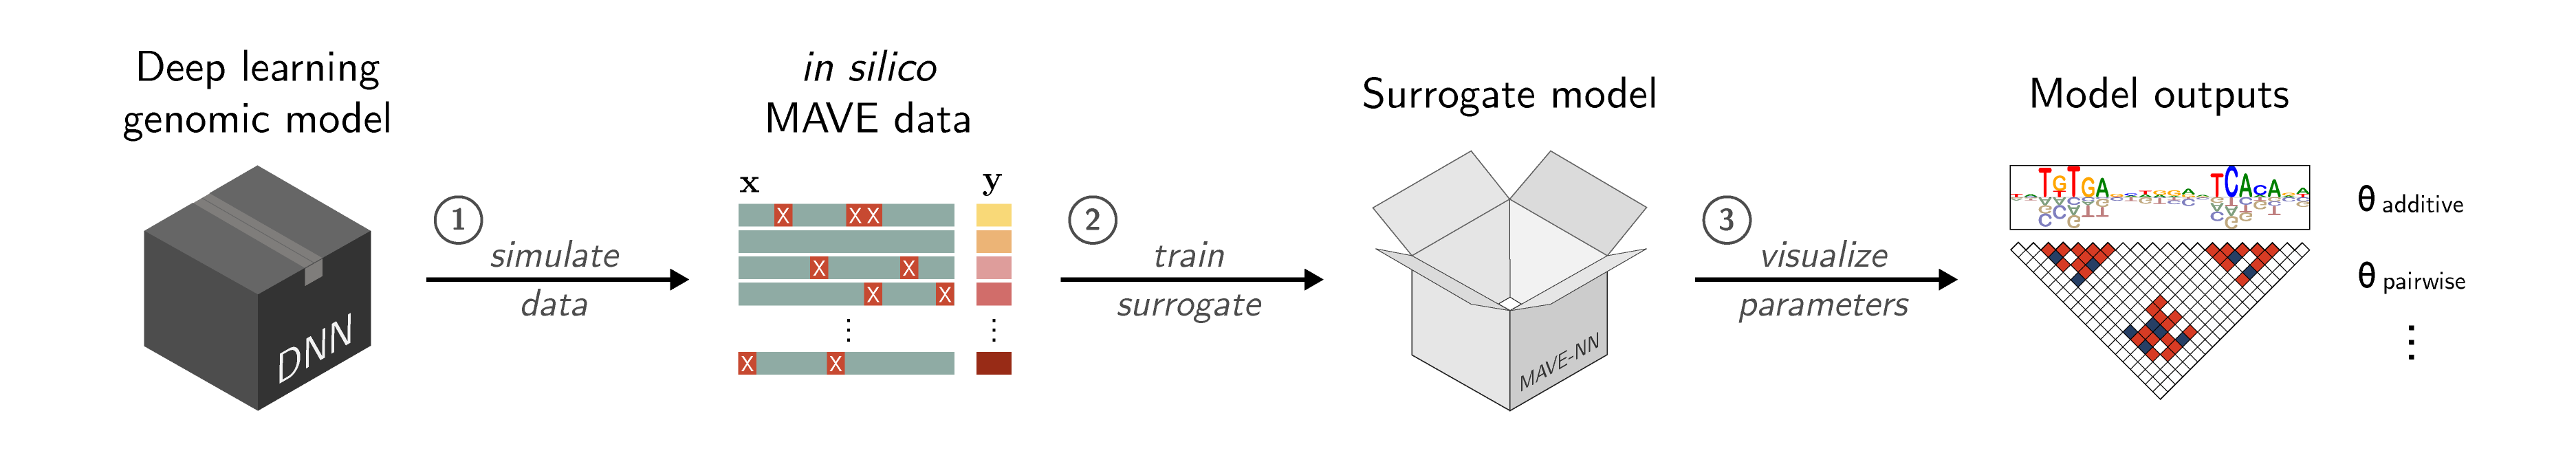

In [21]:
Image("schematic_D.png")

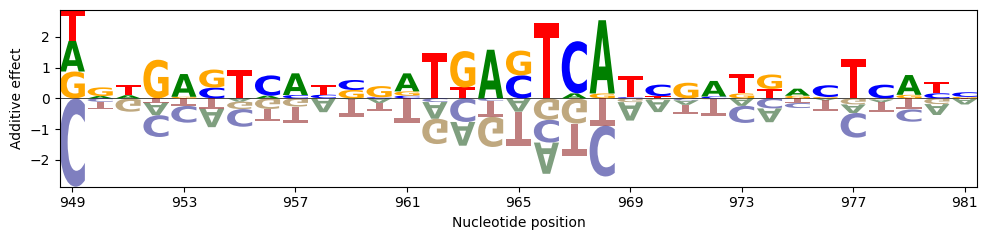

In [22]:
# plot additive logo
fig = squid.impress.plot_additive_logo(logo, center=True, view_window=mut_window, alphabet=alphabet, fig_size=[10,2.5])

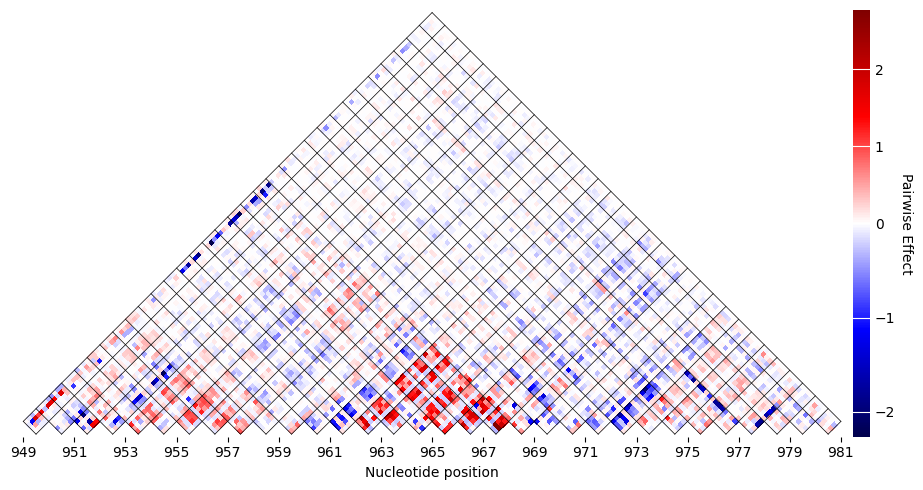

In [23]:
# plot pairwise matrix
fig = squid.impress.plot_pairwise_matrix(params[2], view_window=mut_window, alphabet=alphabet)